# Human Interpretable model predictions

The aim of this notebook is to display the decision making process of a decision tree in a way that a human can interpret to help with the understanding of a models predictions.

Dataset: https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset

## Imports 

In [66]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Load the data

Since the goal of this notebook is only to demonstrate the display of a decision tree the data set I have chosen is a pretty simple classification problem and doesn't require any cleaning or preprocessing steps before training.

In [8]:
file = "Crop_Recommendation.csv"
df = pd.read_csv(file)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


## Split the data in to train and test splits

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

## Train the model

In [58]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluate

In [59]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9931818181818182

## Plot the decision tree

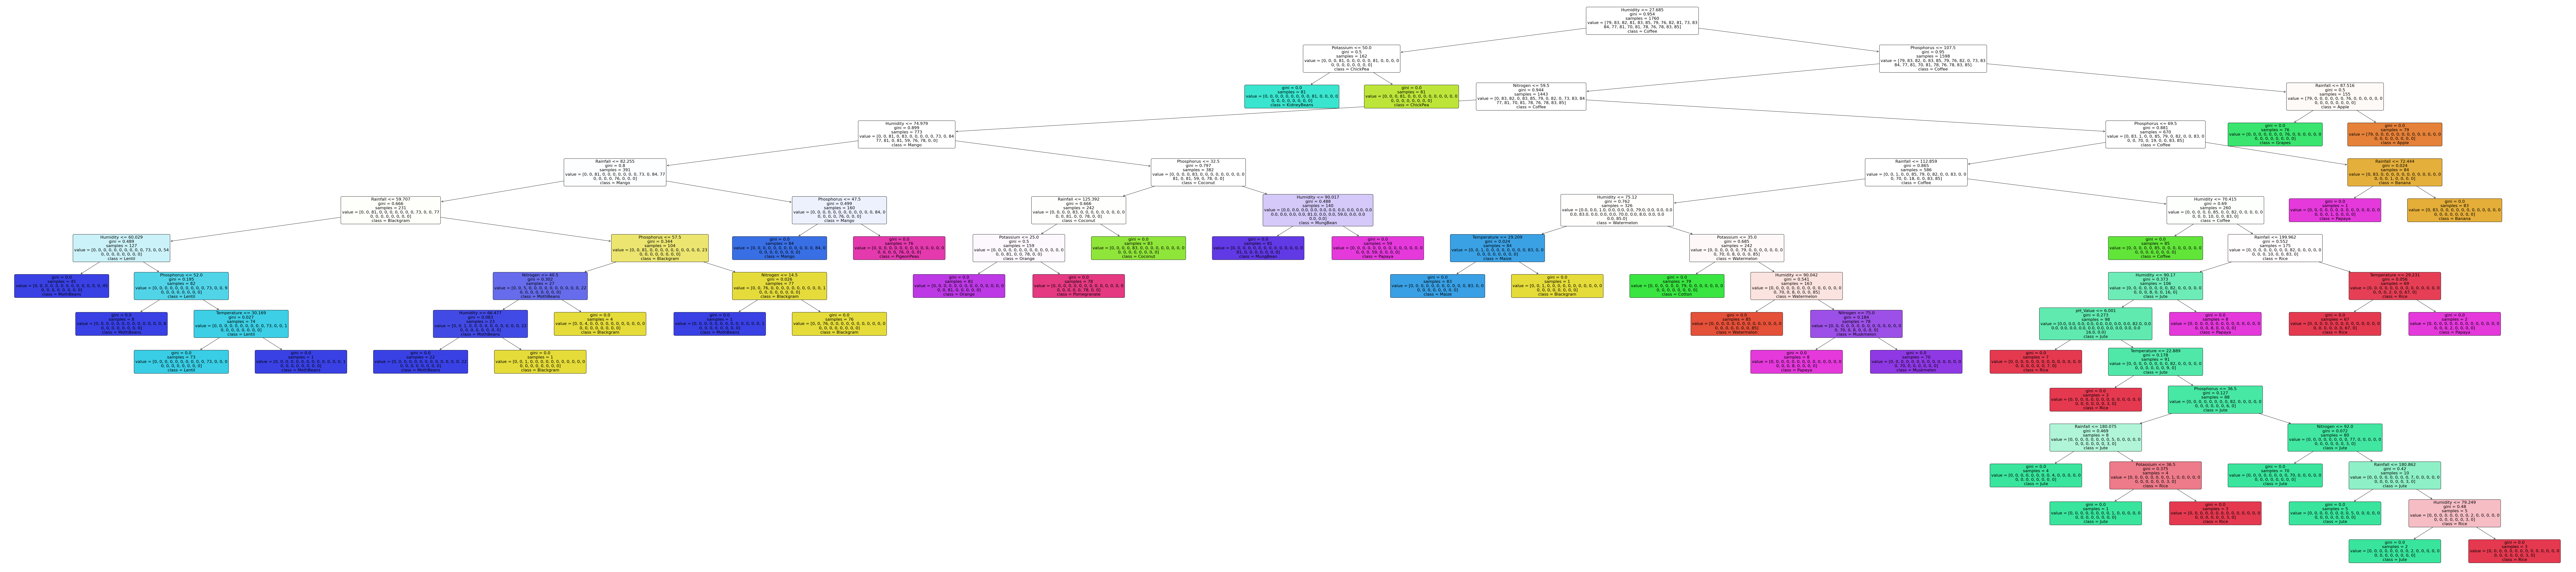

In [67]:
plt.figure(figsize=(180,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_.astype(str),impurity=True, rounded=True, fontsize=16)
plt.show()

## Conclusion
To conclude this notebook I took a data set from Kaggle used for recommending which crops to grow in which fields and trained a decision tree using sklearn to then plot a human-readable output of the tree to remove the “black box” obfuscation of the model and allow for a better trust in the models outputs.
